# Simple Neural Networks

In [81]:
import pandas as pd 
import os 
import sys 
import pickle

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler

rcParams['figure.figsize'] = 14, 7
rcParams['lines.linewidth'] = 2.5
rcParams['axes.prop_cycle'] = cycler(color = ['#424242'])
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'

In [46]:
df = pd.read_csv('Gopalganj_14 devices data_21 April -8 June 2023 - Gopalganj_14 devices data_21 April -29 May.csv')
df['dt_time'] = pd.to_datetime(df['dt_time'])
df.set_index('dt_time', inplace=True)
print(df.shape)
df.head()

(1153, 47)


,PM25,RH,AT,WS,WD,pm25_1211220109,temperature_1211220109,humidity_1211220109,pm25_1212220023,temperature_1212220023,...,RH.3_5002914AB52D,PM25.4_8CAAB56B9EAF,Temp.4_8CAAB56B9EAF,RH.4_8CAAB56B9EAF,PM25.5_E0980690FF7B,Temp.5_E0980690FF7B,RH.5_E0980690FF7B,PM25.6_F4CFA2D625EE,Temp.6_F4CFA2D625EE,RH.6_F4CFA2D625EE
dt_time,,,,,,,,,,,,,,,,,,,,,
2023-04-21 10:00:00,53.50,27.75,35.40,2.65,238.50,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-21 11:00:00,50.25,26.25,36.80,2.30,236.25,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-21 12:00:00,42.00,25.25,38.15,2.35,234.50,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-21 13:00:00,33.00,24.75,38.48,2.33,230.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-21 14:00:00,27.75,26.00,38.33,2.05,230.75,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
for col in df.columns:

    null_values = df[col].isnull().sum()
    if null_values > 150:
        df.drop(col, axis=1, inplace=True)

In [84]:
df_int = df.interpolate(method='linear', axis=1, limit=None)
print(df_int.isnull().sum())

PM25                      0
RH                        0
AT                        0
WS                        0
WD                        0
pm25_1212220023           0
temperature_1212220023    0
humidity_1212220023       0
pm25_1201230044           0
temperature_1201230044    0
humidity_1201230044       0
pm25_1212220159           0
temperature_1212220159    0
humidity_1212220159       0
PM25_2CF4328C5AB4         0
Temp_2CF4328C5AB4         0
RH_2CF4328C5AB4           0
PM25.1_2CF4328C5BAD       0
Temp.1_2CF4328C5BAD       0
RH.1_2CF4328C5BAD         0
PM25.3_5002914AB52D       0
Temp.3_5002914AB52D       0
RH.3_5002914AB52D         0
PM25.4_8CAAB56B9EAF       0
Temp.4_8CAAB56B9EAF       0
RH.4_8CAAB56B9EAF         0
PM25.5_E0980690FF7B       0
Temp.5_E0980690FF7B       0
RH.5_E0980690FF7B         0
PM25.6_F4CFA2D625EE       0
Temp.6_F4CFA2D625EE       0
RH.6_F4CFA2D625EE         0
dtype: int64


In [74]:
print(df_int.shape)

(1153, 32)


In [85]:
y_true = df_int.iloc[:, 0]
all_add = df_int.iloc[:, 1:5]

final_list = []

for i in range(5, 32, 3):
    x = df_int.iloc[:, i:i+3]
    x_cat = pd.concat([x, all_add], axis=1)
    print(x_cat.isnull().sum().sum())
    final_list.append((x_cat, y_true))

0
0
0
0
0
0
0
0
0


In [86]:
with open('final_list.pkl', 'wb') as f: 
    pickle.dump(final_list, f)

In [80]:
final_list[0][0].shape, final_list[0][1].shape

((1153, 7), (1153,))

# Try_2

In [1]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchmetrics import MeanAbsolutePercentageError

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tqdm.notebook import tqdm
import sys 
import os
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler

rcParams['figure.figsize'] = 14, 7
rcParams['lines.linewidth'] = 2.5
rcParams['axes.prop_cycle'] = cycler(color = ['#424242'])
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'

In [3]:
df = pd.read_csv('combined.csv')
print(f"df.shape = {df.shape}")
df.head()

df.shape = (1153, 14)


,pm25_1212220023,RH,AT,WS,WD,pm25_1201230044,pm25_1212220159,PM25_2CF4328C5AB4,PM25.1_2CF4328C5BAD,PM25.3_5002914AB52D,PM25.4_8CAAB56B9EAF,PM25.5_E0980690FF7B,PM25.6_F4CFA2D625EE,PM25
0,191.6250,27.75,35.40,2.65,238.50,51.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,53.50
1,188.6875,26.25,36.80,2.30,236.25,46.0,29.5,29.5,29.5,29.5,29.5,29.5,29.5,50.25
2,181.3750,25.25,38.15,2.35,234.50,22.0,24.5,24.5,24.5,24.5,24.5,24.5,24.5,42.00
3,178.0000,24.75,38.48,2.33,230.00,22.0,23.5,23.5,23.5,23.5,23.5,23.5,23.5,33.00
4,178.8125,26.00,38.33,2.05,230.75,23.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,27.75


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(f"X.shape = {X.shape}, y.shape = {y.shape}")

X.shape = (1153, 13), y.shape = (1153,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=482)
print(f"X_train.shape = {X_train.shape}, X_test.shape = {X_test.shape}")
print(f"y_train.shape = {y_train.shape}, y_test.shape = {y_test.shape}")

X_train.shape = (1037, 13), X_test.shape = (116, 13)
y_train.shape = (1037,), y_test.shape = (116,)


In [6]:
# scaling the train dataset
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train.values)
X_test_norm = scaler.transform(X_test.values)

In [7]:
# converting into pytorch tensors

X_train_tensor = torch.from_numpy(X_train_norm).type(torch.float32)
y_train_tensor = torch.from_numpy(y_train.values).type(torch.float32)

X_test_tensor = torch.from_numpy(X_test_norm).type(torch.float32)
y_test_tensor = torch.from_numpy(y_test.values).type(torch.float32)

print(f"X_train_tensor = {X_train_tensor.shape}, X_test_tensor.shape = {X_test_norm.shape}")
print(f"y_train_tensor.shape = {y_train_tensor.shape}, y_test_tensor.shape = {y_test_tensor.shape}")

X_train_tensor = torch.Size([1037, 13]), X_test_tensor.shape = (116, 13)
y_train_tensor.shape = torch.Size([1037]), y_test_tensor.shape = torch.Size([116])


In [8]:
class Main_Model(nn.Module):

    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(13, 6), nn.ReLU(),
            nn.Linear(6, 1)
        )
        # self.net = nn.Sequential(
        #     nn.Linear(13, 1)
        # )

    def forward(self, X):
        return self.net.forward(X)

In [35]:
max_iterations = 20
lr = 0.5

In [40]:
# main_model = Main_Model()
main_model = nn.Linear(13, 1)
criterion = nn.MSELoss()
# optimizer = optim.Adam(main_model.parameters(), lr=lr)
optimizer = optim.Adam(main_model.parameters(), lr=lr)
mape = MeanAbsolutePercentageError()

In [43]:
for epoch in tqdm(range(max_iterations)):

    main_model.train()

    y_hat = main_model(X_train_tensor)
    loss = criterion(y_hat, y_train_tensor)

    # print(y_hat.shape, y_train_tensor.shape)
    # sys.exit()
    mape_val = mape(y_hat.view(-1), y_train_tensor)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if epoch%5 == 0:

        print(f"epoch : {epoch}/{max_iterations}, loss = {loss.item()}, mape_train = {mape_val.item()}")

        with torch.no_grad():

            main_model.eval()
            pred = main_model.forward(X_test_tensor)
            mape_val = mape(pred.view(-1), y_test_tensor)
            print(f"mape_val = {mape_val.item()}")
            
        print('\n')
        print('*' * 100)

  0%|          | 0/20 [00:00<?, ?it/s]

epoch : 0/20, loss = 5193.0439453125, mape_train = 1.0019668340682983
mape_val = 0.9612126350402832


****************************************************************************************************
epoch : 5/20, loss = 3992.560791015625, mape_train = 0.791004478931427
mape_val = 0.7546294927597046


****************************************************************************************************
epoch : 10/20, loss = 3052.005615234375, mape_train = 0.6031441688537598
mape_val = 0.5592886209487915


****************************************************************************************************
epoch : 15/20, loss = 2370.9755859375, mape_train = 0.4607175588607788
mape_val = 0.40890732407569885


****************************************************************************************************


/Users/arnav39/Desktop/project1/venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1037])) that is different to the input size (torch.Size([1037, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [44]:
main_model.eval()

with torch.no_grad():
    # print(f"X_test_tensor.shape = {X_test_tensor.shape}")
    final_pred = main_model(X_test_tensor)
    # print(f"final_pred.shape = {final_pred.shape}")

final_pred_np = final_pred.view(-1).numpy()
print(final_pred_np.shape, y_test_tensor.shape)

(116,) torch.Size([116])


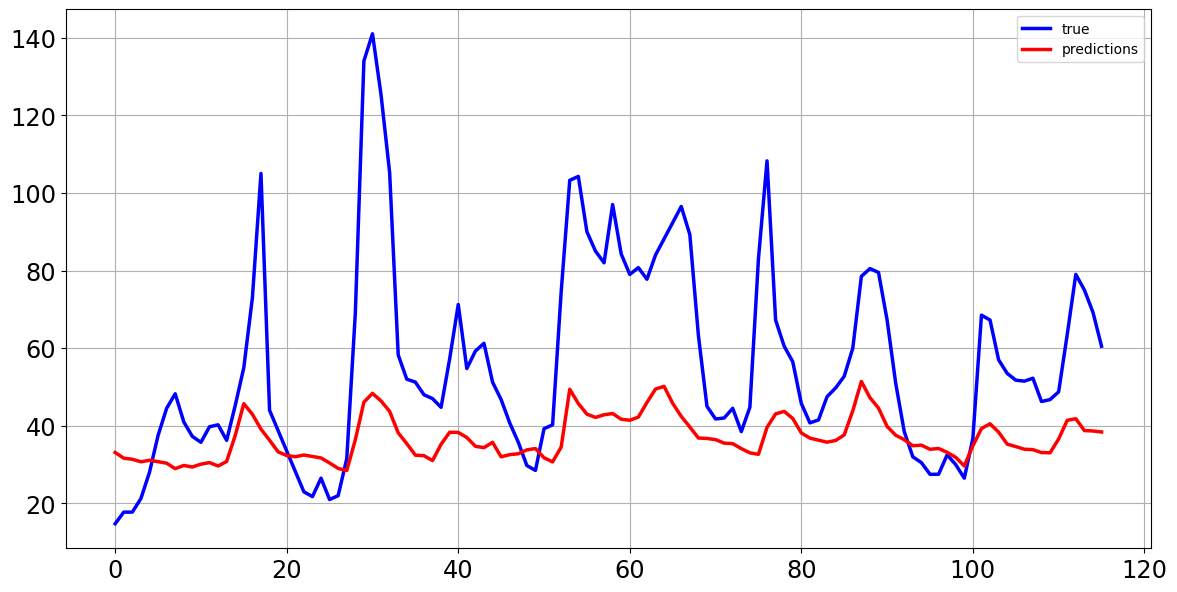

In [45]:
x = np.arange(len(final_pred_np))
plt.plot(x, y_test.values, color='blue', label='true')
plt.plot(x, final_pred_np, color='red', label='predictions')
plt.grid()
plt.legend()
plt.show()
